# M2 T01: Visualització gràfica d'un dataset

Complementa les tècniques d'exploració de les dades mitjantçant la visualització gràfica, amb les llibreries Matplotlib i Searborn.


## Exercici 1

Resumeix gràficament el data set **DelayedFlights.csv**

Crea almenys una visualització per:
- Una variable categòrica (UniqueCarrier)
- Una variable numèrica (ArrDelay)
- Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
- Dues variables numèriques (ArrDelay i DepDelay)
- Tres variables (ArrDelay, DepDelay i UniqueCarrier)
- Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).


_Llegim les dades que estan en format CSV, **DelayedFlights.csv**. Per això hem d'importar la llibreria **pandas**, aprofitem per carregar també les llibreries de visualització de dades **matplotlib.pyplot**i **seaborn**, que és la que ens permetrà fer gràfics_

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./../data/DelayedFlights.csv', index_col=0)

C:\Users\Nuria\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


_Visualització d'una **variable categòrica** (UniqueCarrier)_

_Abans de dibuixar el gràfic de barres, hem de crear una taula on per cada companyia es disposi del nombre total de vols, això ho farem a partir de la instrucció value_counts. A partir de les dades d'aquesta taula creem el diagrama de barres, modifiquem el color de les barres, posem nom als eixos i titol_

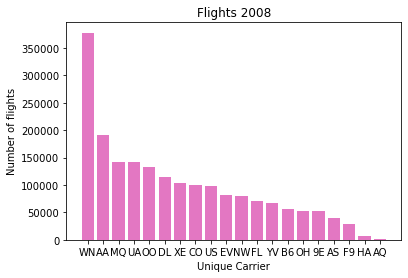

In [3]:
carrier_counts = df['UniqueCarrier'].value_counts()
plt.bar(carrier_counts.index,carrier_counts.values,color='C6')
plt.xlabel("Unique Carrier")
plt.ylabel("Number of flights")
plt.title("Flights 2008")
plt.savefig("./../results/Barres UniqueCarrier.png")
plt.show()

_Visualització d'una **variable numèrica** (ArrDelay)_

_Al tractar-se d'una variables numèrica farem un histograma_

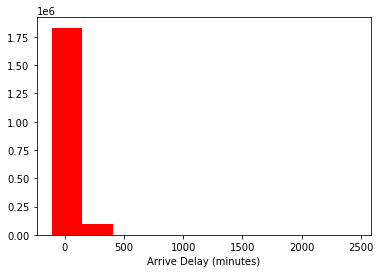

In [4]:
plt.hist(df['ArrDelay'],color="Red")
plt.xlabel("Arrive Delay (minutes)")
plt.savefig("./../results/Histograma ArrDelay.png")
plt.show()

_A la vista de l'histograma, la variable **ArrDelay** ha de tenir algun anòmal. Fem un anàlisi descriptiu_ 

In [5]:
df['ArrDelay'].describe()

count    1.928371e+06
mean     4.219988e+01
std      5.678472e+01
min     -1.090000e+02
25%      9.000000e+00
50%      2.400000e+01
75%      5.600000e+01
max      2.461000e+03
Name: ArrDelay, dtype: float64

_Hi ha valors molt elevats. Dibuixem un Boxplot, on es graficaran els outliers_

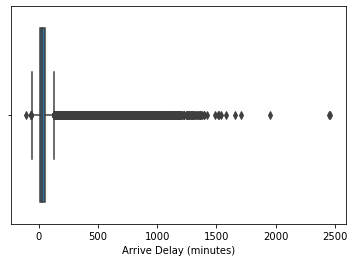

In [6]:
ax = sns.boxplot(x=df['ArrDelay'])
plt.xlabel("Arrive Delay (minutes)")
plt.savefig("./../results/Boxplot ArrDelay.png")

_Visualització d'una **variable numèrica i una categòrica** (ArrDelay i UniqueCarrier)_

_Com hem fet amb la variable numèrica, farem boxplot per a casdascun dels valors de la variable **UniqueCarrier**_

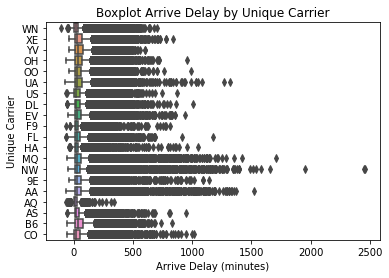

In [7]:
ax = sns.boxplot(x=df['ArrDelay'],y=df['UniqueCarrier'])
plt.xlabel("Arrive Delay (minutes)")
plt.ylabel("Unique Carrier")
plt.title("Boxplot Arrive Delay by Unique Carrier")
plt.savefig("./../results/Boxplot ArrDelay-UniqueCarrier.png")

_Visualització de **dues variables numèriques** (ArrDelay i DepDelay)_

_Per a gràficar dues variables numèriques, farem servir un diagrama de dispersió_

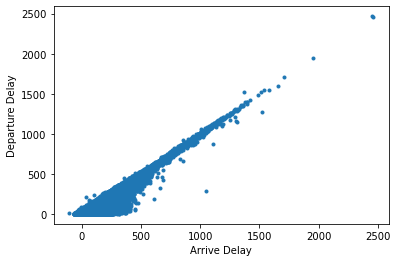

In [8]:
plt.scatter(df['ArrDelay'],df['DepDelay'],marker='.')
plt.xlabel("Arrive Delay")
plt.ylabel("Departure Delay")
plt.savefig("./../results/Scatterplot Delay.png")
plt.show()

_Visualització de **tres variables (dues variables numèriques i una categòrica)** (ArrDelay, DepDelay i UniqueCarrier)_

_De la mateixa manera que abans, farem un diagrama de dispersió de les dues variables numèriques i els punts es pintaran pels diferents valors de la variable **UniqueCarrier**_

<ipython-input-9-90788f4d4a70>:7: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("./../results/Scatterplot Delay-UniqueCarrier.png")
C:\Users\Nuria\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


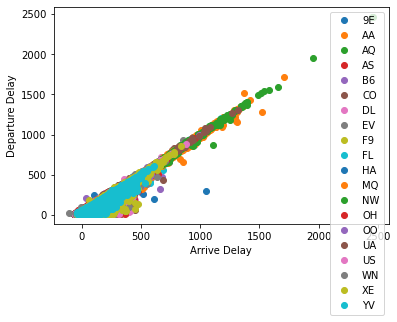

In [9]:
groups = df.groupby('UniqueCarrier')
for name, group in groups:
    plt.plot(group['ArrDelay'], group['DepDelay'], marker="o", linestyle="", label=name)
plt.legend()
plt.xlabel("Arrive Delay")
plt.ylabel("Departure Delay")
plt.savefig("./../results/Scatterplot Delay-UniqueCarrier.png")
plt.show()

_Una altra opció és fer un jointplot_

<ipython-input-10-28a8cca5eb33>:4: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("./../results/Joinplot Delay-UniqueCarrier.png")
C:\Users\Nuria\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


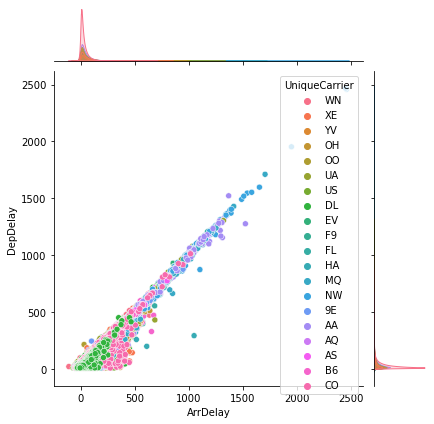

In [10]:
sns.jointplot(x=df['ArrDelay'], y=df['DepDelay'], hue=df['UniqueCarrier'])
plt.xlabel("Arrive Delay")
plt.ylabel("Departure Delay")
plt.savefig("./../results/Joinplot Delay-UniqueCarrier.png")
plt.show()

_Visualització de **més de tres variables** (ArrDelay, DepDelay, AirTime i UniqueCarrier)_

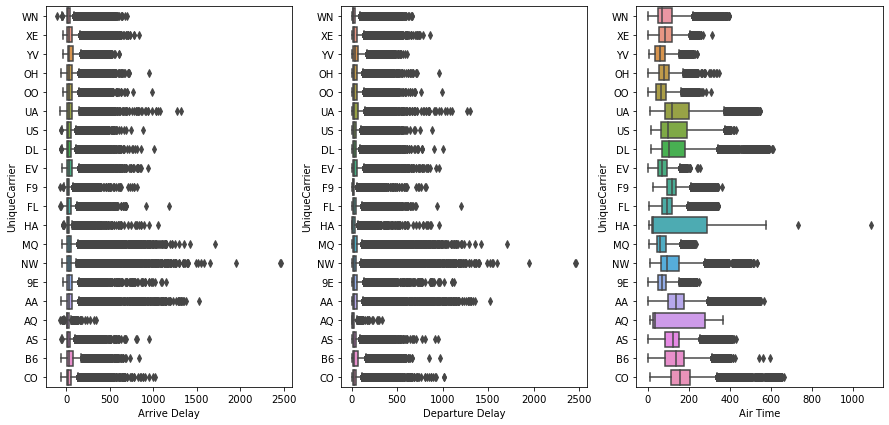

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(15,7))
sns.boxplot(x=df['ArrDelay'],y=df['UniqueCarrier'],ax=axs[0])
sns.boxplot(x=df['DepDelay'],y=df['UniqueCarrier'],ax=axs[1])
sns.boxplot(x=df['AirTime'],y=df['UniqueCarrier'],ax=axs[2])
axs[0].set_xlabel('Arrive Delay')
axs[1].set_xlabel('Departure Delay')
axs[2].set_xlabel('Air Time')
plt.savefig("./../results/Boxplot Delay-AirTime-UniqueCarrier.png")
plt.show()

## Exercici 2

Exporta els gràfics com imatges o com html.

_Tots els gràfics de l'exercici anterior s'han guardat en format png, fent servir la instrucció **plt.savefig**. Tal com es pot veure en el codi_

## Exercici 3

Integra les visualitzacions gràfiques, en la tasca 2, del Mòdul 1.

_A la tasca 2 del mòdul 1 ja havia integrat alguna visualització gràfica, millora dels gràfics presentats:_

- _Número de vols per mes_

In [12]:
mes_counts = df['Month'].value_counts(sort = False)
mes_counts.index = ('Gener','Febrer','Març','Abril','Maig','Juny','Juliol','Agost','Setembre','Octubre','Novembre','Desembre')
mes_counts

Gener       183527
Febrer      189534
Març        200842
Abril       155264
Maig        153072
Juny        200914
Juliol      182945
Agost       162648
Setembre     95539
Octubre     103525
Novembre    105563
Desembre    203385
Name: Month, dtype: int64

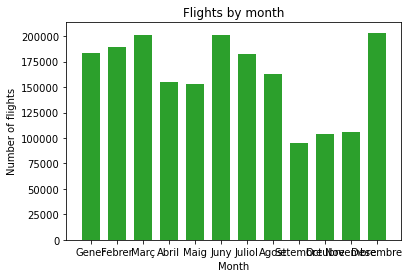

In [13]:
plt.bar(mes_counts.index,mes_counts.values,width=0.7,color='C2')
plt.xlabel("Month")
plt.ylabel("Number of flights")
plt.title("Flights by month")
plt.show()

- _Número de vols per dia de la setmana_

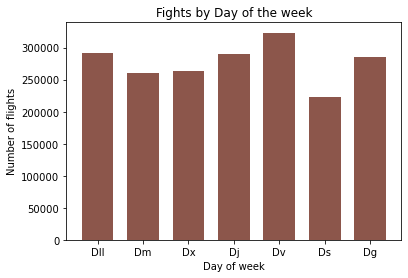

In [14]:
dia_counts = df['DayOfWeek'].value_counts(sort = False)
dia_counts.index = ('Dll','Dm','Dx','Dj','Dv','Ds','Dg')
plt.bar(dia_counts.index,dia_counts.values,width=0.7,color='C5')
plt.xlabel("Day of week")
plt.ylabel("Number of flights")
plt.title("Fights by Day of the week")
plt.show()

- _Vols cancel·lats_

In [15]:
df.cancel = df[df['Cancelled'] == 1]
code_cancel = df.cancel['CancellationCode'].value_counts()
code_cancel

<ipython-input-15-e83dee1f1a86>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.cancel = df[df['Cancelled'] == 1]


B    307
A    246
C     80
Name: CancellationCode, dtype: int64

([<matplotlib.patches.Wedge at 0x2a800284c70>,
 [Text(0.051844411161577814, 1.0987775739572179, 'B'),
  Text(-0.4726998046203682, -0.9932546978050827, 'A'),
  Text(1.0144298257261475, -0.425361174388564, 'C')],
 [Text(0.028278769724496985, 0.5993332221584824, '48.5%'),
  Text(-0.2578362570656553, -0.5417752897118632, '38.9%'),
  Text(0.5533253594869895, -0.23201518603012578, '12.6%')])

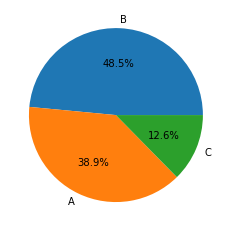

In [16]:
plt.pie(code_cancel.values, labels=code_cancel.index, autopct='%1.1f%%')